In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
x_train=pd.read_csv("ERA\\ERA_train_x.csv")
y_train=pd.read_csv("ERA\\ERA_train_y.csv")
x_test=pd.read_csv("ERA\\ERA_test_x.csv")
y_test=pd.read_csv("ERA\\ERA_test_y.csv")

In [19]:
def build_model():
  model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[len(x_train.keys())]),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [20]:
x_train=x_train.drop(columns=["T_ID", "YEAR"])
x_test=x_test.drop(columns=["T_ID", "YEAR"])
y_train=y_train.drop(columns=["T_ID", "YEAR"])
y_test=y_test.drop(columns=["T_ID", "YEAR"])

In [21]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              47104     
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 1025      
Total params: 3,196,929
Trainable params: 3,196,929
Non-trainable params: 0
_________________________________________________________________


In [22]:
early_stop = EarlyStopping(monitor='loss', mode = 'min',patience=2, verbose=1)

history = model.fit(
  x_train, y_train,
  epochs=100, validation_split = 0.2, verbose=1,
  callbacks=[early_stop])

W0927 20:08:50.749439 19016 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Train on 2336 samples, validate on 584 samples
Epoch 1/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 17.8513 - mae: 1.7756 - mse: 17.8513 - val_loss: 0.8768 - val_mae: 0.7402 - val_mse: 0.8768
Epoch 2/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 2.2356 - mae: 1.2195 - mse: 2.2356 - val_loss: 0.6275 - val_mae: 0.6461 - val_mse: 0.6275
Epoch 3/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 1.7293 - mae: 1.0468 - mse: 1.7293 - val_loss: 0.9054 - val_mae: 0.7937 - val_mse: 0.9054
Epoch 4/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 1.4127 - mae: 0.9537 - mse: 1.4127 - val_loss: 2.6080 - val_mae: 1.4408 - val_mse: 2.6080
Epoch 5/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 1.3562 - mae: 0.9276 - mse: 1.3562 - val_loss: 1.2110 - val_mae: 0.9268 - val_mse: 1.2110
Epoch 6/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 1.1984 - mae: 0.8674 - mse:

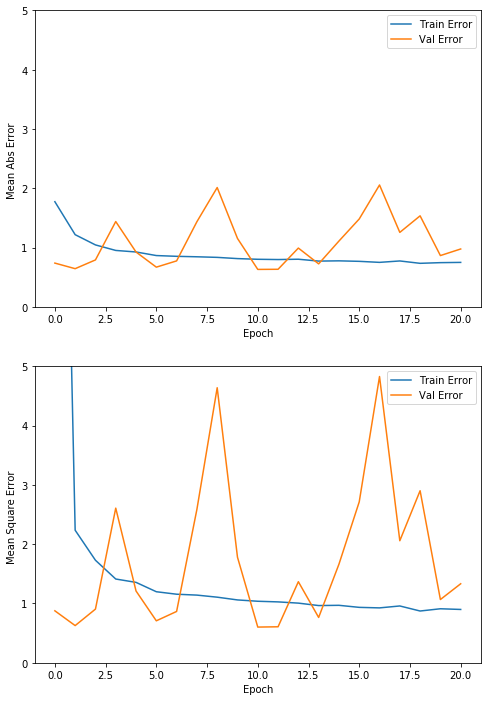

In [23]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error ')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error ')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  plt.show()

plot_history(history)

In [24]:
loss, mae, mse = model.evaluate(x_test, y_test['ERA'], verbose=2)

print("테스트 세트의 mae: {:5.4f} ".format(mae))
print("테스트 세트의 mse: {:5.4f} ".format(mse))

W0927 20:10:02.949164 19016 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


50/50 - 0s - loss: 0.9355 - mae: 0.7498 - mse: 0.9355
테스트 세트의 mae: 0.7498 
테스트 세트의 mse: 0.9355 


In [25]:
y_test=pd.read_csv("ERA\\ERA_test_y.csv")
y_TID=y_test["T_ID"]
y_YEAR=y_test["YEAR"]

In [26]:
pred=model.predict(x_test)
y_test["pred"]=pred
y_test['T_ID']=y_TID
y_test['YEAR']=y_YEAR
y_test=y_test[['YEAR', 'T_ID', 'ERA', 'pred']]

W0927 20:10:03.009975 19016 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


In [27]:
y_test

,YEAR,T_ID,ERA,pred
0,2016,HH,5.258114,5.223586
1,2016,HT,4.120827,5.131183
2,2016,KT,6.314516,5.355158
3,2016,LG,3.649770,5.091204
4,2016,LT,5.849294,5.365805
5,2016,NC,3.575342,5.224793
6,2016,OB,4.710280,5.215390
7,2016,SK,5.144882,5.114315
8,2016,SS,5.400000,5.206896
9,2016,WO,5.704839,5.018594


In [29]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test['ERA'], pred)

In [30]:
mse

0.9354531797465592